This notebook demonstrates the use of Python to explore a dataset containing offensive speech along with other attributes. Learning goals of this notebook - <br>
* Organize the data in Pandas dataframe, a key data structure of Python
* Provide some descriptive statistics about the dataset
* Prepare the comments containing offensive speeches for further texual analysis by removing stopwords, lowercasing, stemming, etc
* Use CountVectorizer module to convert the collection of speeches (or, comments) into a matrix containing term or word frequencies in each comment
* Calculate TF-IDF score of each term or word to determine the importance of that term in a specific comment

Content Warning: The fetched dataset in this notebook contains hateful and harrassing comments which some may find offensive. 

Author: Saklain Zaman


In [ ]:
# Code Block 1
# URL of the dataset as csv file in github repo
url = "https://raw.githubusercontent.com/jmstanto/speechdata/main/Ethos%20Data/Ethos_Data_Exerpt.csv"

In [ ]:
# Code Block 2
import pandas as pd
import requests
import io

In [ ]:
# Code Block 3
# Read the csv file from url into a Pandas dataframe
df = pd.read_csv(url) 
print(df.head())

                                             comment  violence  \
0  Why does Bulgaria exist as a country? It's one...       0.0   
1  This is considered WHITE in Sweden. No wonder ...       0.0   
2                           fucking slut deserved it       0.0   
3  Even when at the income advantage, niggers sti...       1.0   
4  This Korean bitch is like a pig. That’s how th...       0.0   

   directed_vs_generalized  gender  race  national_origin  disability  \
0                 0.500000     0.0  0.00         0.428571         0.0   
1                 0.250000     0.0  0.50         0.250000         0.0   
2                 1.000000     1.0  0.00         0.000000         0.0   
3                 0.000000     0.0  0.75         0.250000         0.0   
4                 0.833333     0.0  0.00         1.000000         0.0   

   religion  sexual_orientation  
0      0.00            0.571429  
1      0.25            0.000000  
2      0.00            0.000000  
3      0.00            0.000

In the given code, the dataset is stored in a pandas dataframe, a rectangular data structure. Pandas provide various in-built capabilities for performing analytical tasks.

In [ ]:
# Code Block 4
df.shape  # This dataset has 216 rows and 9 columns as different attributes

(216, 9)

The pandas DataFrame has 216 comments for offensive speech detection. Other attributes of the comments are also stored in the DataFrame.



In [ ]:
# Code Block 5
comments = df['comment'] 
comments # 216 comments 

0      Why does Bulgaria exist as a country? It's one...
1      This is considered WHITE in Sweden. No wonder ...
2                               fucking slut deserved it
3      Even when at the income advantage, niggers sti...
4      This Korean bitch is like a pig. That’s how th...
                             ...                        
211    what happened in the good old days when these ...
212          Looks like the gay poster boy with syphilis
213    Serbia should kill gays in yugoslavia and not ...
214    I would pull you over for your race, if I was ...
215    I remember once I was in charge of a disabled ...
Name: comment, Length: 216, dtype: object

In [ ]:
# Code Block 6
list(df.columns) # The 9 columns contain the comments and various attributes of the comments/commenter

['comment',
 'violence',
 'directed_vs_generalized',
 'gender',
 'race',
 'national_origin',
 'disability',
 'religion',
 'sexual_orientation']

In [ ]:
# Code Block 7
# Some descriptive statistics about the dataset
df.describe() 

,violence,directed_vs_generalized,gender,race,national_origin,disability,religion,sexual_orientation
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,0.323179,0.326196,0.202727,0.162901,0.183064,0.131445,0.159221,0.170265
std,0.365858,0.374234,0.335466,0.316957,0.332915,0.318816,0.332987,0.341246
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.200000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,0.666667,0.214286,0.166667,0.200000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Code Block 8
# Count of elements in each column
df.count()

comment                    216
violence                   216
directed_vs_generalized    216
gender                     216
race                       216
national_origin            216
disability                 216
religion                   216
sexual_orientation         216
dtype: int64

In [ ]:
# Code Block 9
# Mean of columns values for every column
df.mean()

<ipython-input-197-1dc7ec9c2094>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


violence                   0.323179
directed_vs_generalized    0.326196
gender                     0.202727
race                       0.162901
national_origin            0.183064
disability                 0.131445
religion                   0.159221
sexual_orientation         0.170265
dtype: float64

For further texual analysis of the comments, the comments need to be cleaned, and then, converted into a Document-Term frequency matrix. In this step, from the comments, the stop words are removed, words are converted to lowercase, words are stemmed, and finally, a pandas dataframe will be generated containing term frequencies. <br>

In the dataframe, each row represent a document (or, comment) and there are columns equal to total number of words in the vocabulary. This is generally a very sparse matrix as most of the words don't appear in a single document but there's a lot of words in the vocabulary.

CountVectorizer module from sklearn is used to create a document-term frequency matrix from the comments. Each integer element in the matrix represent the frequency of the respective word in a specific document.

In [ ]:
# Code Block 10
# Import some important libraries 
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer

In [ ]:
# Code Block 11
# Import the list of stopwords
all_stopwords = text.ENGLISH_STOP_WORDS

# Create a stemmer object 
stemmer = PorterStemmer()

# Helper function for stemming 
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc)) 

In [ ]:
# Code Block 12
# Create countvectorizer object  
# Supports preprocessing (lowercasing, removing stopwords, stemming) on raw data
vectorizer = CountVectorizer(lowercase=True, stop_words=all_stopwords, analyzer=stemmed_words) 

In [ ]:
# Code Block 13
# Create sparse DTM (Document-Term Matrix)
spDTM = vectorizer.fit_transform(df['comment'])

# Store the DTM in pandas dataframe
spDTM = pd.DataFrame(spDTM.toarray())

# Set the column/feature names as document terms
spDTM.columns = vectorizer.get_feature_names_out()

In [ ]:
# Code Block 14
spDTM # Display the DTM for the collection of comments

,000,100,12,2012,2019,25,250,2nd,39t,50,...,you,young,your,yourself,yourselv,yugoslavia,äòsick,çsorri,ôll,ôt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
214,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
# Code Block 15
spDTM.shape # The total vocabulary size should be 1243 and there's 216 comments in total

(216, 1243)

In [ ]:
# Code Block 16
spDTM.info() # Some additional information about the datatype, count and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Columns: 1243 entries, 000 to ôt
dtypes: int64(1243)
memory usage: 2.0 MB


In [ ]:
# Code Block 17
# Get the list of vocabulary with their frequency from the vectorizer object
vocabulary_ = list(vectorizer.vocabulary_.keys())

In [ ]:
# Code Block 18
# Check the number of tokens in the vocabulary 
print(len(vocabulary_)) 

1243


In [ ]:
# Code Block 19
# Print the list of vocabulary
print(vocabulary_) 

['whi', 'doe', 'bulgaria', 'exist', 'as', 'countri', 'it', 'one', 'of', 'those', 'homosexu', 'thi', 'is', 'consid', 'white', 'in', 'sweden', 'no', 'wonder', 'they', 'accept', 'all', 'black', 'and', 'muslim', 'immigr', 'are', 'liter', 'color', 'blind', 'fuck', 'slut', 'deserv', 'even', 'when', 'at', 'the', 'incom', 'advantag', 'nigger', 'still', 'get', 'btfo', 'becaus', 'your', 'race', 'monkey', 'tri', 'to', 'do', 'human', 'thing', 'should', 'be', 'extinguish', 'korean', 'bitch', 'like', 'pig', 'that', 'how', 'made', 'an', 'armi', 'sumo', 'there', 'their', 'shithol', 'porn', 'industri', 'billion', 'dollar', 'beauti', 'women', 'best', 'way', 'kill', 'femin', 'feminist', 'ignor', 'them', 'then', 'watch', 'ôll', 'resort', 'onli', 'weapon', 'have', 'pussi', 'ugli', 'convinc', 'can', 'take', 'over', 'everyth', 'includ', 'male', 'sport', 'by', 'use', 'bring', 'down', 'men', 'through', 'sexual', 'harass', 'me', 'too', 'scandal', 'what', 'would', 'make', 'headlin', 'news', 'some', 'sex', 'with'

The terms present in the collection of document can be visually displayed as a wordcloud. <br>
The modules - **wordcloud** and **matplotlib** are used to demonstrate this visualization.

In [ ]:
# Code Block 20
# !pip install wordcloud
# !pip install matplotlib

In [ ]:
# Code Block 21
# Import wordcloud and matplotlib module to create and display a wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Code Block 22
# Append all the words in the vocabulary to match the input format of the wordcloud module
vocabulary = ' '.join(vocabulary_).lower()

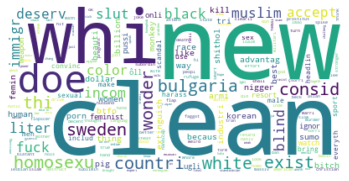

In [ ]:
# Code Block 23
# Create the wordcloud object
wordcloud = WordCloud(stopwords = all_stopwords,
                      collocations=True,
                      background_color='white'
                      ).generate(vocabulary)

# Plot the wordcloud object using matplotlib
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()


We want to understand how relevant a word is in a document or comment, considering the collection of documents. **TF-IDF (Term Frequency - Inverse Document Frequency)** is an approach to measure this. 

TF-IDF is the multiplication of two terms - TF and IDF. <br>
**TF** represents the frequency of a word or term in a document (or, comment). <br>
**IDF** is the logarithm of total number of documents divided by the number of documents containing the specific term plus 1. 

TF-IDF score helps to quantify the relevancy of a term or word in a collection of documents.

The TF-IDF calculation can be performed either manually through word level frequency counting and then, doing additional calculations, or by using the TF-IDF model provided by sklearn. <br>

In this notebook, both approaches are demonstrated, and the results of both are compared and contrasted. 

In [ ]:
# Code Block 24
import math
import numpy as np

Perforing manual calculation for measuring TF-IDF scores.

In [ ]:
# Code Block 25
# Helper function to calculate idf weights for words
def idfcalc(n_total, n_docs):
  return math.log10((n_total)/(n_docs))+1 # Logarithm of total number of documents divided by the number of documents containing the specific term plus 1

In [ ]:
# Code Block 26
# Use the transpose of the document term frequency matrix for easier calculations 
tf = spDTM.transpose() 
print(tf.iloc[20:30, 100:110]) # Display a snippet of the DTM

          100  101  102  103  104  105  106  107  108  109
across      0    0    0    0    0    0    0    0    0    0
act         0    0    0    0    0    0    0    0    0    0
actual      0    0    0    0    0    1    1    0    0    0
addict      0    0    0    0    0    0    0    0    0    0
admit       0    0    0    0    0    0    0    0    0    0
adress      0    0    0    0    0    0    0    0    0    0
advantag    0    0    0    0    0    0    0    0    0    0
af          0    0    0    0    0    0    0    0    0    0
affect      0    0    0    0    0    0    0    0    0    0
africa      0    0    0    0    0    0    0    0    0    0


In [ ]:
# Code Block 27
# Count the number of non-zero values in every row 
# It represents the count of documents in which a specific word appears
docs_count = tf.astype(bool).sum(axis=1) 
n_total = len(tf.columns) # Total document count 
n_total

216

In [ ]:
# Count of appearances of every term in seperate documents 
docs_count 

000           1
100           3
12            1
2012          1
2019          1
             ..
yugoslavia    1
äòsick        1
çsorri        1
ôll           1
ôt            1
Length: 1243, dtype: int64

In [ ]:
# Code Block 28
# Calculate idf weights for each words using the function we defined before
idf = docs_count.apply(lambda doc_freq: idfcalc(n_total, doc_freq)) 
idf

000           3.334454
100           2.857332
12            3.334454
2012          3.334454
2019          3.334454
                ...   
yugoslavia    3.334454
äòsick        3.334454
çsorri        3.334454
ôll           3.334454
ôt            3.334454
Length: 1243, dtype: float64

In [ ]:
# Code Block 29
# Convert idf scores into a diagonal matrix to simplify the computation
idf = pd.DataFrame(np.diag(idf),index=idf.index,columns=idf.index) 
idf

,000,100,12,2012,2019,25,250,2nd,39t,50,...,you,young,your,yourself,yourselv,yugoslavia,äòsick,çsorri,ôll,ôt
000,3.334454,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
100,0.000000,2.857332,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
12,0.000000,0.000000,3.334454,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2012,0.000000,0.000000,0.000000,3.334454,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2019,0.000000,0.000000,0.000000,0.000000,3.334454,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yugoslavia,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.334454,0.000000,0.000000,0.000000,0.000000
äòsick,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,3.334454,0.000000,0.000000,0.000000
çsorri,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,3.334454,0.000000,0.000000
ôll,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,3.334454,0.000000


In [ ]:
# Code Block 30
# Multiply the idf and tf matrix to calculate tf-idf score matrix
tf_idf = idf.dot(tf)
tf_idf

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2012,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.334454,0.0,0.0,0.000000,0.0,0.0
2019,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yugoslavia,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,3.334454,0.0,0.0
äòsick,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
çsorri,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
ôll,0.0,0.0,0.0,0.0,0.0,3.334454,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


In [ ]:
# Code Block 31
# Transpose the matrix to set the documents as rows and words/terms as columns
tf_idf = tf_idf.transpose() 
tf_idf

,000,100,12,2012,2019,25,250,2nd,39t,50,...,you,young,your,yourself,yourselv,yugoslavia,äòsick,çsorri,ôll,ôt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,1.829304,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,3.334454,0.0,0.0,0.0,0.0
214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.635484,0.0,1.829304,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


L2 normalization can be applied to calculated TF-IDF scores to scale the values. It scales the values in every row in such a way that if all the values in a row are squared and summed, the result will be 1.

In [ ]:
# Code Block 32
# Apply L2 normalization to manually calculated tf-idf matrix
def l2norm(row):
  return row/((row**2).sum()**.5) # Each row element is divided by the square root of the squared summation of all elements in that row

l2_tf_idf = tf_idf.apply(lambda x: l2norm(x), axis=1) # L2 normalization of tf_idf matrix
l2_tf_idf.iloc[30:43, 55:65]

,and,angel,ani,anim,anoth,answer,ant,anti,anybodi,anymor
30,0.172117,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
31,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
32,0.145797,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
33,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
34,0.000000,0.0,0.0,0.41752,0.000000,0.0,0.0,0.0,0.0,0.0
35,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
36,0.000000,0.0,0.0,0.00000,0.277422,0.0,0.0,0.0,0.0,0.0
37,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
38,0.086184,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
39,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0


After the manual TF-IDF calculation, the built-in model from sklearn is imported for calculating the TF-IDF scores.

In [ ]:
# Code Block 33
# Import model for TF-IDF calculation from sklearn
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
# Code Block 34
# Get TfidfTransformer model with L2 normalization
tfidf_transformer = TfidfTransformer(norm='l2') 

# Use the DTM as input to the TfidfTransformer model
sp_tf_idf = tfidf_transformer.fit_transform(spDTM) 

# Convert the generated tf-idf matrix to pandas dataframe
sp_tf_idf = pd.DataFrame(sp_tf_idf.toarray()) 

# Use the features(words) as the column names of the tf-idf matrix
sp_tf_idf.columns = tfidf_transformer.get_feature_names_out() 

sp_tf_idf.iloc[30:43, 55:60]

,and,angel,ani,anim,anoth
30,0.145352,0.0,0.0,0.000000,0.000000
31,0.000000,0.0,0.0,0.000000,0.000000
32,0.124395,0.0,0.0,0.000000,0.000000
33,0.000000,0.0,0.0,0.000000,0.000000
34,0.000000,0.0,0.0,0.432552,0.000000
35,0.000000,0.0,0.0,0.000000,0.000000
36,0.000000,0.0,0.0,0.000000,0.290257
37,0.000000,0.0,0.0,0.000000,0.000000
38,0.072838,0.0,0.0,0.000000,0.000000
39,0.000000,0.0,0.0,0.000000,0.000000


In [ ]:
# Code Block 35
print("Manually calculated tf-idf matrix:\n")
# print(round(tf_idf.head()))
print(round(tf_idf.iloc[30:43, 55:60],2))

Manually calculated tf-idf matrix:

    and  angel  ani  anim  anoth
30  1.5    0.0  0.0  0.00   0.00
31  0.0    0.0  0.0  0.00   0.00
32  1.5    0.0  0.0  0.00   0.00
33  0.0    0.0  0.0  0.00   0.00
34  0.0    0.0  0.0  2.86   0.00
35  0.0    0.0  0.0  0.00   0.00
36  0.0    0.0  0.0  0.00   2.73
37  0.0    0.0  0.0  0.00   0.00
38  1.5    0.0  0.0  0.00   0.00
39  0.0    0.0  0.0  0.00   0.00
40  1.5    0.0  0.0  0.00   0.00
41  0.0    0.0  0.0  0.00   0.00
42  1.5    0.0  0.0  0.00   0.00


In [ ]:
# Code Block 36
print("Manually calculated tf-idf matrix after L2 normalization:\n")
print(round(l2_tf_idf.iloc[30:43, 55:60],2))

Manually calculated tf-idf matrix after L2 normalization:

     and  angel  ani  anim  anoth
30  0.17    0.0  0.0  0.00   0.00
31  0.00    0.0  0.0  0.00   0.00
32  0.15    0.0  0.0  0.00   0.00
33  0.00    0.0  0.0  0.00   0.00
34  0.00    0.0  0.0  0.42   0.00
35  0.00    0.0  0.0  0.00   0.00
36  0.00    0.0  0.0  0.00   0.28
37  0.00    0.0  0.0  0.00   0.00
38  0.09    0.0  0.0  0.00   0.00
39  0.00    0.0  0.0  0.00   0.00
40  0.07    0.0  0.0  0.00   0.00
41  0.00    0.0  0.0  0.00   0.00
42  0.08    0.0  0.0  0.00   0.00


In [ ]:
# Code Block 37
print("Tf-idf matrix using TfidfTransformer:\n")
print(round(sp_tf_idf.iloc[30:43, 55:60],2))

Tf-idf matrix using TfidfTransformer:

     and  angel  ani  anim  anoth
30  0.15    0.0  0.0  0.00   0.00
31  0.00    0.0  0.0  0.00   0.00
32  0.12    0.0  0.0  0.00   0.00
33  0.00    0.0  0.0  0.00   0.00
34  0.00    0.0  0.0  0.43   0.00
35  0.00    0.0  0.0  0.00   0.00
36  0.00    0.0  0.0  0.00   0.29
37  0.00    0.0  0.0  0.00   0.00
38  0.07    0.0  0.0  0.00   0.00
39  0.00    0.0  0.0  0.00   0.00
40  0.06    0.0  0.0  0.00   0.00
41  0.00    0.0  0.0  0.00   0.00
42  0.07    0.0  0.0  0.00   0.00


In [ ]:
# Code Block 38
print("Actual word frequency for comparison:\n")
print(spDTM.iloc[30:43, 55:60])

Actual word frequency for comparison:

    and  angel  ani  anim  anoth
30    1      0    0     0      0
31    0      0    0     0      0
32    1      0    0     0      0
33    0      0    0     0      0
34    0      0    0     1      0
35    0      0    0     0      0
36    0      0    0     0      1
37    0      0    0     0      0
38    1      0    0     0      0
39    0      0    0     0      0
40    1      0    0     0      0
41    0      0    0     0      0
42    1      0    0     0      0
